In [47]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pickle
import sys

import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pprint
import pyedflib

project_root = '..'
sys.path.append(project_root)

from sleep.data.loader import load_dataset
from sleep.detection.feeder_dataset import FeederDataset
from sleep.detection.predicted_dataset import PredictedDataset
from sleep.detection import metrics
from sleep.common import constants, pkeys, checks
from sleep.data import utils

%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

RESULTS_PATH = os.path.join(project_root, 'results')
SEED_LIST = [123, 234, 345, 456]

CUSTOM_COLOR = {'red': '#c62828', 'grey': '#455a64', 'blue': '#0277bd', 'green': '#43a047'} 

In [95]:
ckpt_folder = '20190504_bsf'
task_mode = constants.WN_RECORD
dataset_name = constants.MASS_SS_NAME
seed_id = 0
chosen_thr = 0.5
which_expert = 1
verbose = False

dataset = load_dataset(dataset_name)
all_train_ids = dataset.train_ids
full_ckpt_folder = '%s_%s_train_%s' % (ckpt_folder, task_mode, dataset_name)
ckpt_path = os.path.abspath(os.path.join(
    RESULTS_PATH,
    'predictions_%s' % dataset_name,
    full_ckpt_folder,
    'bsf',
    'seed%d' % seed_id
))
print('Loading from %s' % ckpt_path)
filename = os.path.join(
    ckpt_path,
    'prediction_%s_%s.pkl' % (task_mode, constants.VAL_SUBSET))
with open(filename, 'rb') as handle:
    prediction_val = pickle.load(handle)  # Predicted Dataset
    
# Validation split
_, val_ids = utils.split_ids_list(
    all_train_ids, seed=SEED_LIST[seed_id], verbose=verbose)
# Prepare expert labels
data_val = FeederDataset(
    dataset, val_ids, task_mode, which_expert=which_expert)
# Prepare model predictions
prediction_val.set_probability_threshold(chosen_thr)

print('Val IDs:', data_val.get_ids(), prediction_val.get_ids())

val_ids = data_val.get_ids()

# Get stamps
events_val = data_val.get_stamps()
detections_val = prediction_val.get_stamps()

Train size: 11. Test size: 4
Train subjects: 
 [1, 3, 5, 7, 9, 10, 11, 14, 17, 18, 19]
Test subjects: 
 [2, 6, 12, 13]
Dataset mass_ss with 15 patients.
Loading from checkpoint... Loaded
Loading from /home/ntapia/Projects/GitNico/sleep-rnn/results/predictions_mass_ss/20190504_bsf_wn_train_mass_ss/bsf/seed0
Val IDs: [5, 11, 19] [5, 11, 19]



Subject ID 5
Number of events 341
Number of detections 439
Number of matched 302
Number of UFP 137, Number of UFN 39
Recall at IoU 0.0: 0.8856304985337243
Precision at IoU 0.0: 0.6879271070615034
F1score at IoU 0.0: 0.7743589743589744
F1score at IoU 0.3: 0.7743589743589744
Pages of UFP: [ 158  160  161  164  165  170  174  182  184  189  265  276  276  290
  296  297  298  299  300  317  318  324  327  331  333  342  363  391
  392  393  393  396  405  406  407  409  418  421  423  424  424  425
  428  465  466  477  481  489  506  509  515  515  527  528  640  642
  644  646  651  684  685  686  691  695  703  712  716  725  733  947
  959  959  963  977  978  986  997 1005 1008 1010 1011 1017 1021 1030
 1033 1033 1071 1088 1088 1102 1114 1119 1120 1125 1129 1129 1130 1131
 1133 1135 1141 1145 1146 1152 1162 1164 1254 1255 1268 1268 1283 1289
 1290 1290 1291 1292 1292 1292 1299 1306 1307 1315 1317 1321 1330 1330
 1346 1348 1352 1365 1368 1400 1527 1532 1535 1535 1553]

Loading states

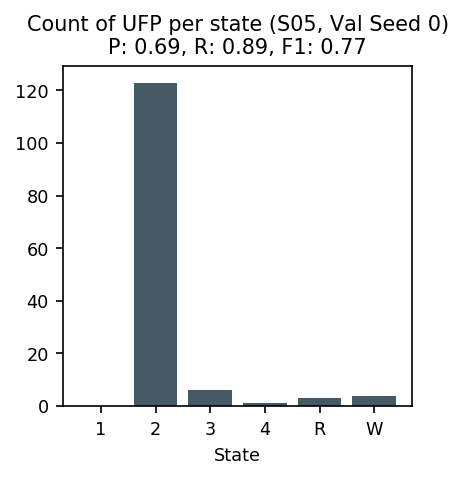

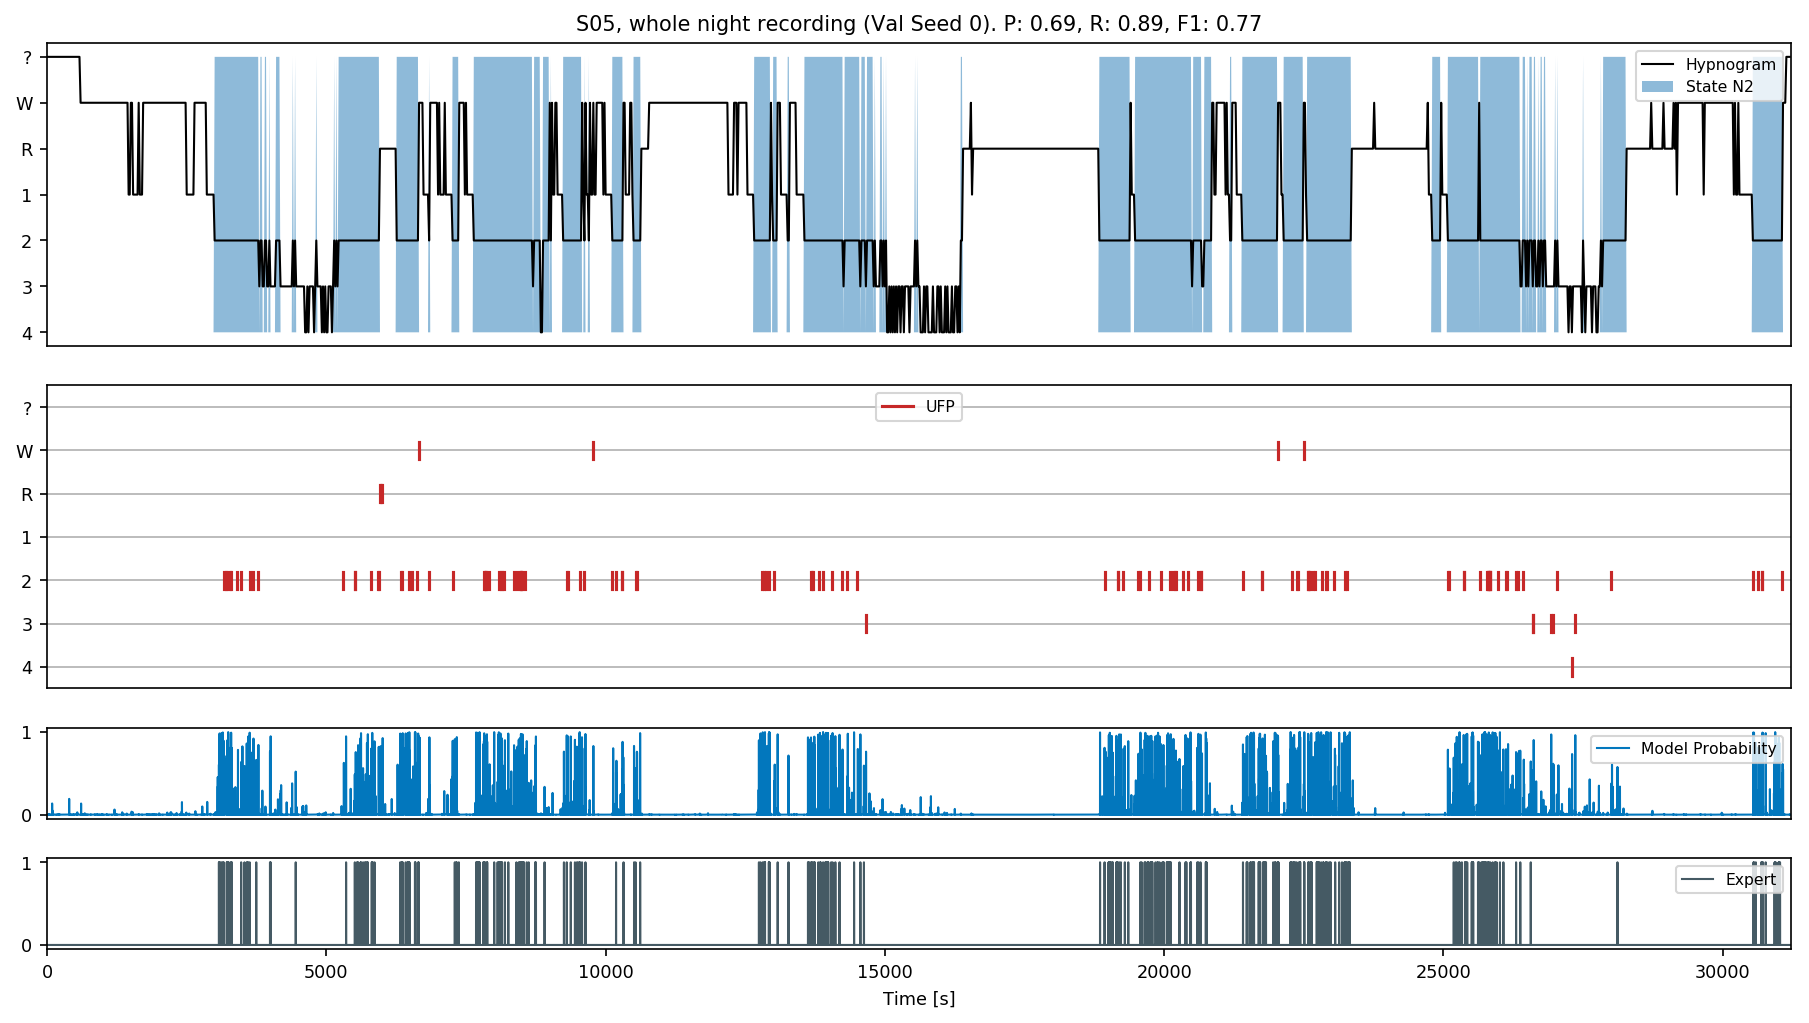


Subject ID 11
Number of events 606
Number of detections 1046
Number of matched 577
Number of UFP 469, Number of UFN 29
Recall at IoU 0.0: 0.9521452145214522
Precision at IoU 0.0: 0.5516252390057361
F1score at IoU 0.0: 0.698547215496368
F1score at IoU 0.3: 0.6961259079903148
Pages of UFP: [  53   53   54   54   56   58   59   59   60   61   62   62   65   65
   65   68   70   71   73   75   75   76   79   79   80   81   81   82
   86   86   87   87   89   89   90   90   92   93   94   95   98   98
  100  102  111  114  115  116  120  122  126  126  142  142  143  144
  145  146  147  149  149  150  153  153  154  157  157  158  165  167
  168  169  172  177  182  189  191  193  195  198  198  200  202  209
  209  211  211  211  212  212  214  216  217  219  221  223  225  226
  227  228  231  231  232  233  238  245  268  269  270  270  271  274
  274  274  275  275  276  278  280  281  284  285  286  286  291  292
  294  294  296  297  299  299  300  301  302  305  306  307  307  308


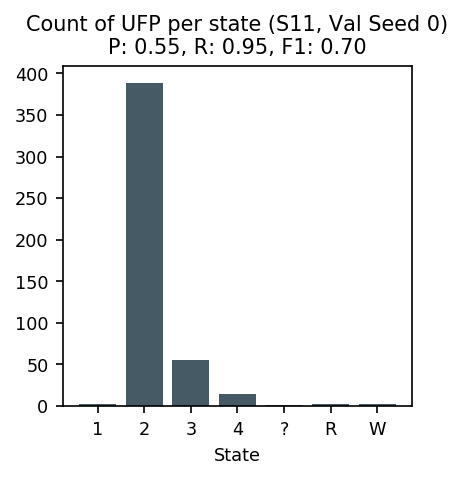

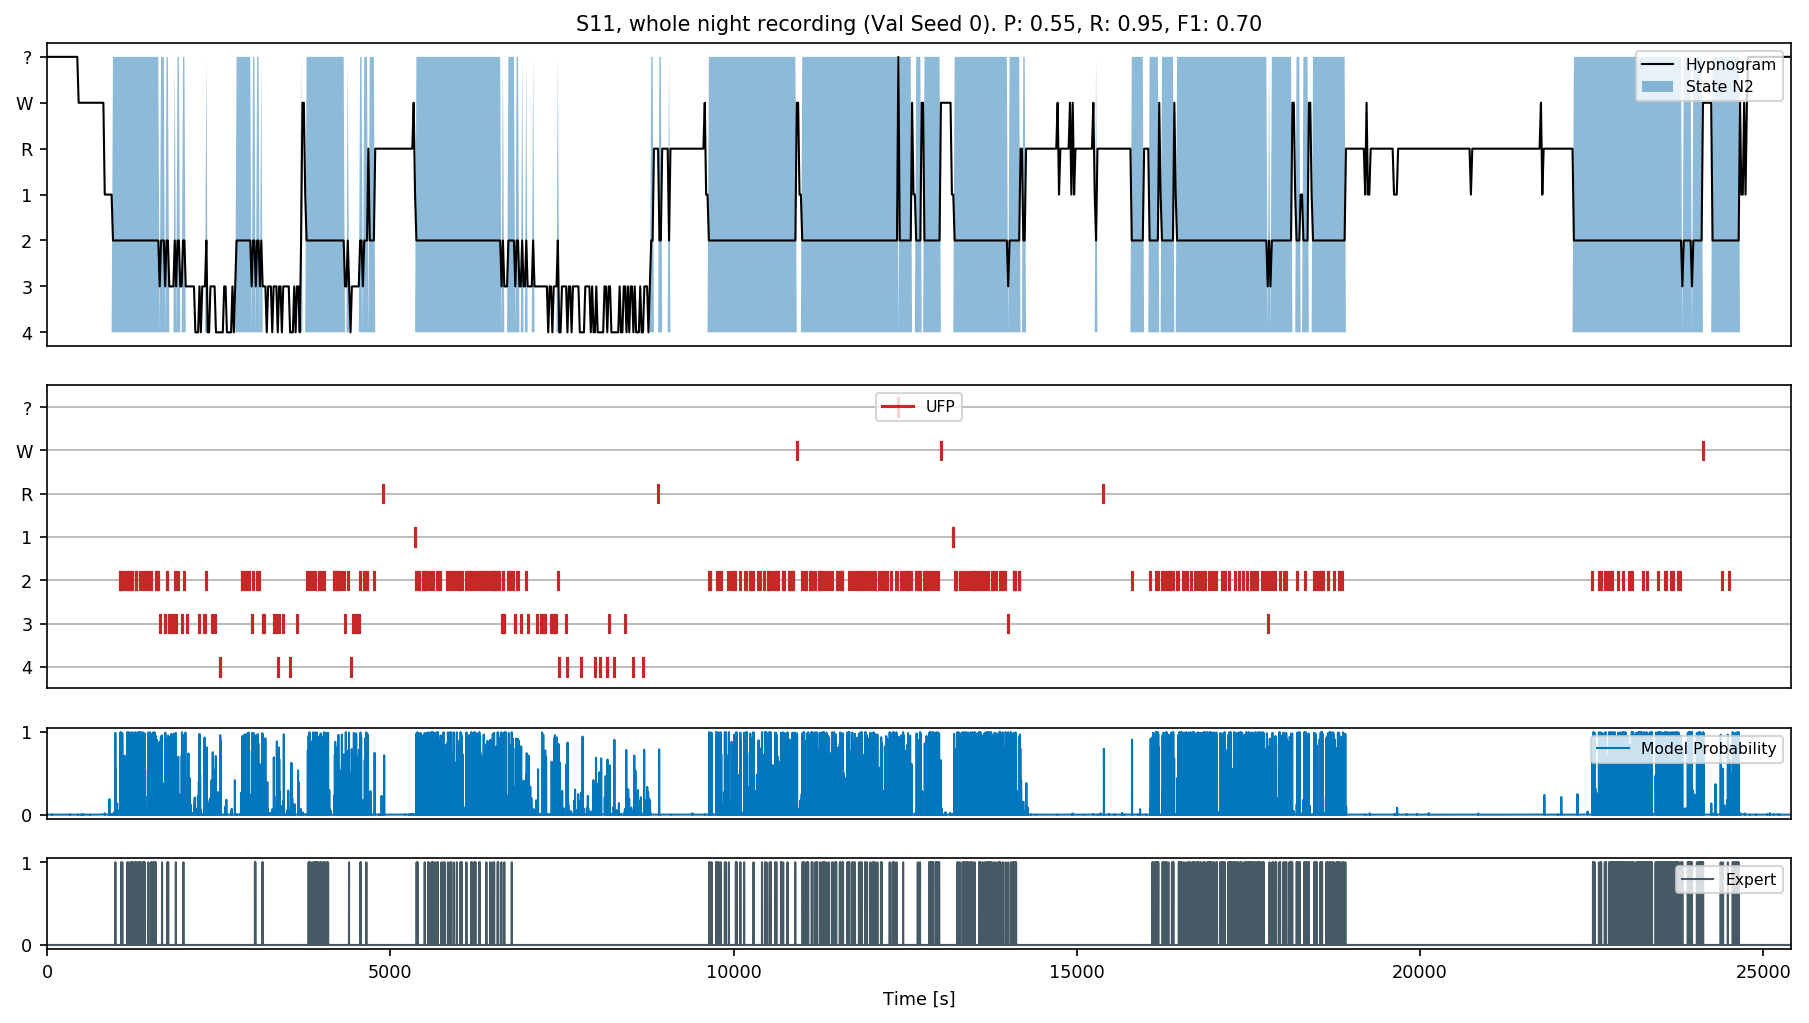


Subject ID 19
Number of events 315
Number of detections 714
Number of matched 311
Number of UFP 403, Number of UFN 4
Recall at IoU 0.0: 0.9873015873015873
Precision at IoU 0.0: 0.43557422969187676
F1score at IoU 0.0: 0.6044703595724004
F1score at IoU 0.3: 0.6044703595724004
Pages of UFP: [  64   68   83   84   85   86   88   88   89   92   93   96   97   99
  107  108  112  113  114  115  115  116  116  120  121  122  125  128
  129  131  132  134  134  137  138  140  142  148  150  152  155  155
  159  160  161  171  171  173  174  179  179  181  186  187  190  193
  204  214  215  217  228  230  245  246  254  255  258  262  263  265
  265  265  270  274  324  331  338  340  341  341  348  349  353  358
  359  362  366  367  371  375  376  382  383  383  386  393  395  396
  398  413  418  425  426  432  440  441  445  452  456  459  460  462
  463  500  503  504  505  517  521  525  525  534  534  535  536  541
  542  546  547  547  550  555  557  558  558  561  564  566  567  571


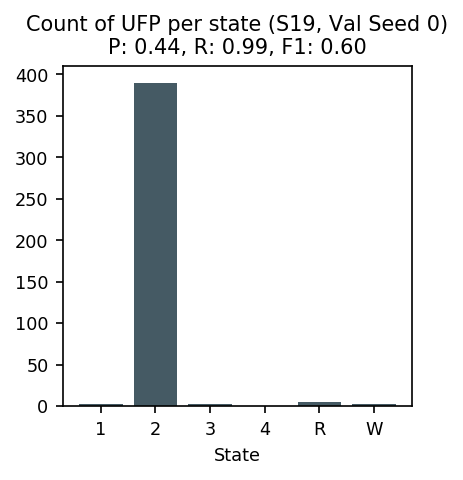

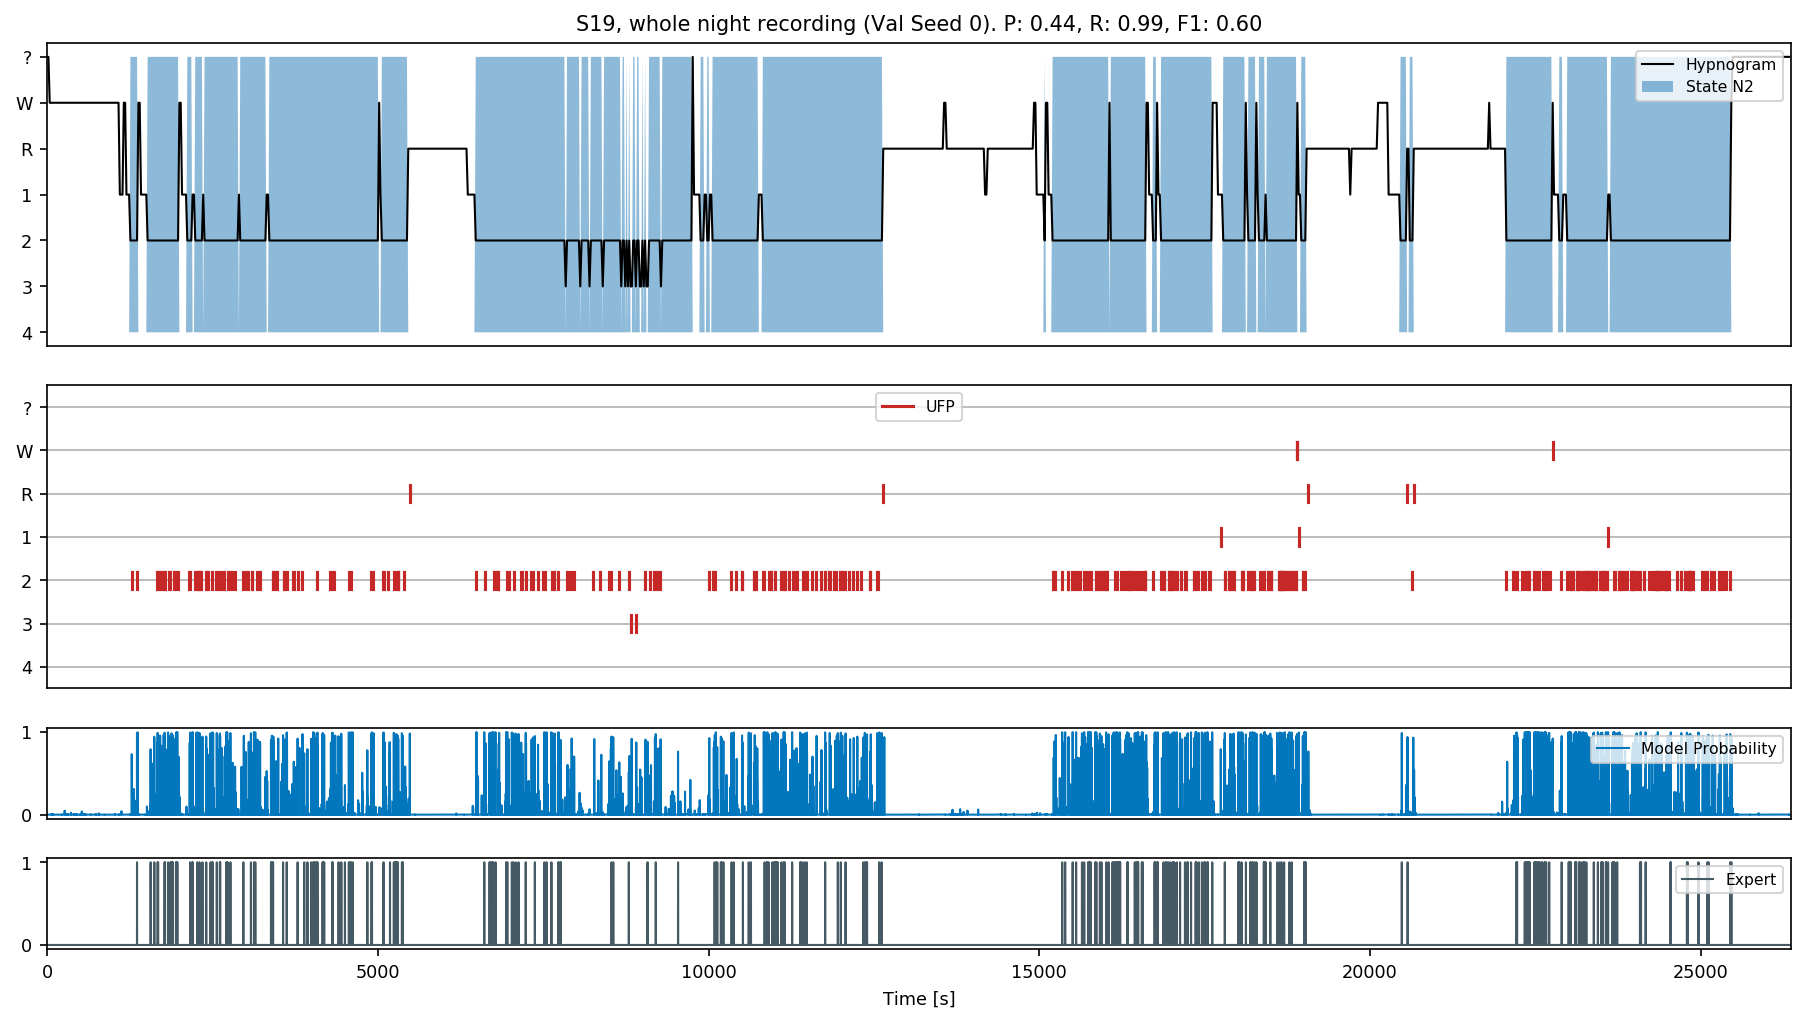

In [99]:
for sub_idx in range(len(val_ids)):

    subject_id = val_ids[sub_idx]
    print('\nSubject ID', subject_id)
    events = events_val[sub_idx]
    detections = detections_val[sub_idx]
    iou_array, idx_array = metrics.matching(events, detections)
    n_detections = detections.shape[0]
    n_events = events.shape[0]
    n_ufn = (idx_array == -1).sum()
    n_matched = n_events - n_ufn
    n_ufp = n_detections - n_matched
    n_matched_at_03 = (iou_array >= 0.3).sum()
    f1_at_03 = 2 * n_matched_at_03 / (n_events + n_detections)
    p_at_03 = n_matched_at_03 / n_detections
    r_at_03 = n_matched_at_03 / n_events
    print('Number of events', n_events)
    print('Number of detections', n_detections)
    print('Number of matched', n_matched)
    print('Number of UFP %d, Number of UFN %d' % (n_ufp, n_ufn))
    print('Recall at IoU 0.0:', n_matched / n_events)
    print('Precision at IoU 0.0:', n_matched / n_detections)
    print('F1score at IoU 0.0:', 2*n_matched / (n_events + n_detections))
    print('F1score at IoU 0.3:', f1_at_03)

    ufp_idx = [i for i in range(n_detections) if i not in idx_array]
    detections_ufp = detections[ufp_idx, :]
    centers_ufp = np.mean(detections_ufp, axis=1)
    pages_ufp = np.floor(centers_ufp / dataset.page_size).astype(np.int32)
    print('Pages of UFP:', pages_ufp)

    # Read states for subset of pages
    print('\nLoading states')
    wn_pages = data_val.get_subject_pages(subject_id)
    wn_pages = np.concatenate([[0], wn_pages])
    filename = os.path.join(dataset.dataset_dir, 'label', 'state', '01-02-%04d Base.edf' % subject_id)

    print('Loaded from %s' % filename)
    with pyedflib.EdfReader(filename) as file:
        annotations = file.readAnnotations()
    onsets = np.array(annotations[0])
    durations = np.round(np.array(annotations[1]))
    stages_str = annotations[2]
    # keep only 20s durations
    valid_idx = (durations == 20)
    onsets = onsets[valid_idx]
    durations = durations[valid_idx]
    stages_str = stages_str[valid_idx]
    
    print('Onsets with durations [s]', np.unique(durations))

    
    stages_dtype = stages_str.dtype
    stages_char = [single_annot[-1] for single_annot in stages_str]
    total_annots = len(stages_char)
    
    numerical_state_values = {
        '1': -1, '2': -2, '3': -3, '4': -4, 'R': 0, 'W': 1, '?': 2
    }
    
    state_key_list = [key for key in numerical_state_values.keys() if key != "?"]
    unk_key =  "?"

    state_dict = {}
    for state_key in state_key_list:
        state_idx = np.where([stages_char[i] == state_key for i in range(total_annots)])[0]
        state_dict[state_key] = np.floor(onsets[state_idx] / dataset.page_duration).astype(np.int32)
    pages_subset_states = []
    for page in wn_pages:
        state_not_found = True
        for state_key in state_key_list:
            if page in state_dict[state_key] and state_not_found:
                pages_subset_states.append(state_key)
                state_not_found = False
        if state_not_found:
            pages_subset_states.append(unk_key)
    pages_subset_states = np.asarray(pages_subset_states)

    print('Pages states unique values:', np.unique(pages_subset_states))

    # Get state of UFP
    states_ufp = pages_subset_states[pages_ufp]

    # Probability
    my_proba = prediction_val.probabilities_dict[subject_id]
    my_proba_time = np.arange(my_proba.shape[0]) / 25

    # Expert stamps
    my_expert = utils.stamp2seq(events, 0, my_proba.shape[0] * 8 + 1)
    my_expert_time = np.arange(my_expert.shape[0]) / 200


    numerical_state = np.zeros(pages_subset_states.shape)
    state_time = np.arange(pages_subset_states.shape[0]) * dataset.page_duration
    all_state_key_list = state_key_list + ['?']
    for state_key in all_state_key_list:
        np.place(numerical_state, pages_subset_states==state_key, numerical_state_values[state_key])

    # plot
    fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=150)
    ax.set_title('Count of UFP per state (S%02d, Val Seed %d)\nP: %1.2f, R: %1.2f, F1: %1.2f' 
                 % (subject_id, seed_id, p_at_03, r_at_03, f1_at_03), fontsize=10)
    unique, counts = np.unique(states_ufp, return_counts=True)
    for state_key in state_key_list:
        if state_key not in unique:
            unique = np.concatenate([unique, [state_key]])
            counts = np.concatenate([counts, [0]])
    sorted_idx = np.argsort(unique)
    unique = unique[sorted_idx]
    counts = counts[sorted_idx]
    ax.bar(unique, counts, width=0.8, bottom=None, facecolor=CUSTOM_COLOR['grey'])
    ax.set_xlabel('State', fontsize=8.5)
    ax.tick_params(labelsize=8.5)
    plt.show()

    # plot
    max_time = np.max([my_expert_time[-1], my_proba_time[-1], state_time[-1]])
    fig = plt.figure(figsize=(15, 8), dpi=150)
    gs = gridspec.GridSpec(4, 1, height_ratios=[2, 2, 0.6, 0.6])

    # Hypnogram
    ax = fig.add_subplot(gs[0])
    ax.set_title('S%02d, whole night recording (Val Seed %d). P: %1.2f, R: %1.2f, F1: %1.2f' 
                 % (subject_id, seed_id, p_at_03, r_at_03, f1_at_03), fontsize=10)
    ax.plot(state_time, numerical_state, color='k', zorder=2, linewidth=1, label='Hypnogram')
    ax.fill_between(state_time, 6 * (numerical_state==-2).astype(int) - 4, -4, alpha=0.5, zorder=1, label='State N2')
    ax.set_yticks([numerical_state_values[my_key] for my_key in numerical_state_values.keys()])
    ax.set_xlim([0, state_time[-1]])
    ax.set_yticklabels(state_key_list + ['?'])
    ax.legend(loc='upper right', fontsize=7.5)
    ax.set_xticks([])
    ax.set_xlim([0, max_time])
    ax.tick_params(labelsize=8.5)

    # detailed UFP
    ax = fig.add_subplot(gs[1])
    ax.set_ylim([-4.5, 2.5])
    ax.set_xticks([])
    ax.set_xlim([0, max_time])
    ax.set_yticks([numerical_state_values[my_key] for my_key in numerical_state_values.keys()])
    ax.set_yticklabels(state_key_list + ['?'])
    label_set = False
    for j, state_key in enumerate(all_state_key_list):
        for k, page in enumerate(pages_ufp):
            if states_ufp[k] == state_key:
                if label_set:
                    label = None
                else:
                    label = 'UFP'
                label_set = True
                page_time = page * dataset.page_duration                
                ax.plot(
                    [page_time, page_time], 
                    [numerical_state_values[state_key] - 0.2, numerical_state_values[state_key] + 0.2], 
                    color=CUSTOM_COLOR['red'], linewidth=1.5, label=label)
    if label_set:
        ax.legend(loc='upper center', fontsize=7.5)
    ax.yaxis.grid()
    ax.tick_params(labelsize=8.5)

    # Model probability
    ax = fig.add_subplot(gs[2])
    ax.plot(my_proba_time, my_proba, label='Model Probability',color=CUSTOM_COLOR['blue'], linewidth=1)
    ax.set_yticks([0, 1])
    ax.legend(loc='upper right', fontsize=7.5)
    ax.set_xticks([])
    ax.set_xlim([0, max_time])
    ax.tick_params(labelsize=8.5)

    # Expert stamps
    ax = fig.add_subplot(gs[3])
    ax.plot(my_expert_time, my_expert, label='Expert',color=CUSTOM_COLOR['grey'], linewidth=1)
    ax.set_yticks([0, 1])
    ax.legend(loc='upper right', fontsize=7.5)
    ax.set_xlim([0, max_time])
    ax.tick_params(labelsize=8.5)
    ax.set_xlabel('Time [s]', fontsize=8.5)

    plt.show()